In [3]:
import os

PATH = "/Users/arbaaz/Downloads/break/ds"
os.listdir(PATH)

['y_train.parquet',
 'X_train.parquet',
 '.gitignore',
 'X_test.reduced.parquet',
 'y_test.reduced.parquet']

In [4]:
x_train_path = PATH+"/X_train.parquet"
y_train_path = PATH+"/y_train.parquet"

In [ ]:
import pandas as pd

df_x = pd.read_parquet(x_train_path)
df_y = pd.read_parquet(y_train_path)

In [19]:
df_x

value  period
id    time                  
0     0    -0.005564       0
      1     0.003705       0
      2     0.013164       0
      3     0.007151       0
      4    -0.009979       0
...              ...     ...
10000 2134  0.001137       1
      2135  0.003526       1
      2136  0.000687       1
      2137  0.001640       1
      2138  0.001074       1

[23715734 rows x 2 columns]

In [12]:
x = df_x["value"].to_numpy()
mean = x.mean()
std = x.std()
mean, std

(np.float64(0.0005728306224853421), np.float64(0.09528225090103917))

In [ ]:
# Group by 'id' and apply Z-score normalization on 'value'
df_x['value_zscore'] = df_x.groupby('id')['value'].transform(
    lambda x: (x - x.mean()) / (x.std() + 1e-8)  # add epsilon to avoid div by zero
)

(np.float64(-57.00730385604509),
 np.float64(55.73396997624832),
 np.float64(3.969808081344363e-21),
 np.float64(0.9997868624542434))

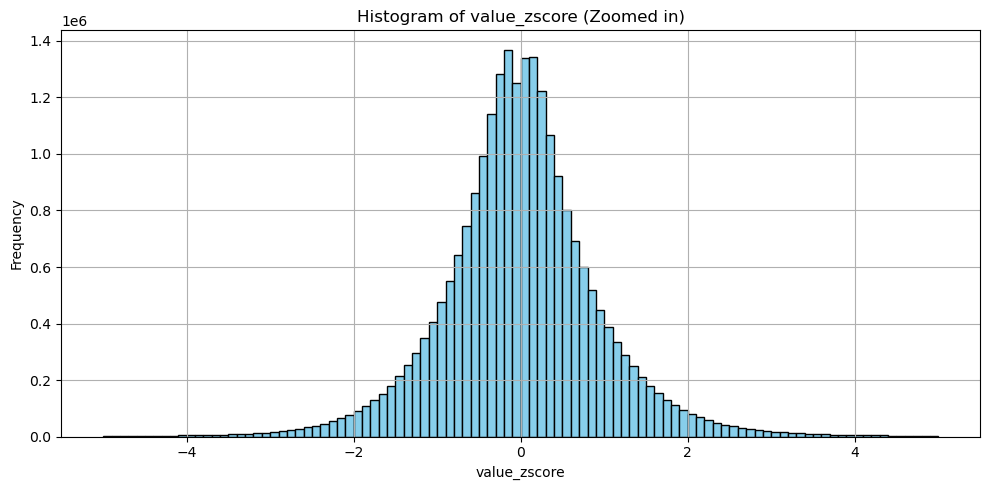

In [30]:
import matplotlib.pyplot as plt

def simple_value_histogram(data, column='value', bins=100, range=(-5, 5)):
    """
    Plots a simple histogram of the 'value' column, zoomed in to small range.

    Parameters:
    - data: pandas.DataFrame
    - column: str, default 'value'
    - bins: int, number of bins
    - range: tuple, x-axis limits to zoom in
    """
    plt.figure(figsize=(10, 5))

    # Plot histogram with zoomed range
    plt.hist(data[column], bins=bins, range=range, color='skyblue', edgecolor='black')

    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column} (Zoomed in)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
simple_value_histogram(df_x, column='value_zscore') # VALUE DISTRIBUTION

In [31]:
# Min-Max normalization per time series (per id)
df_x['value_minmax'] = df_x.groupby('id')['value'].transform(
    lambda x: (x - x.min()) / (x.max() - x.min() + 1e-8)
)


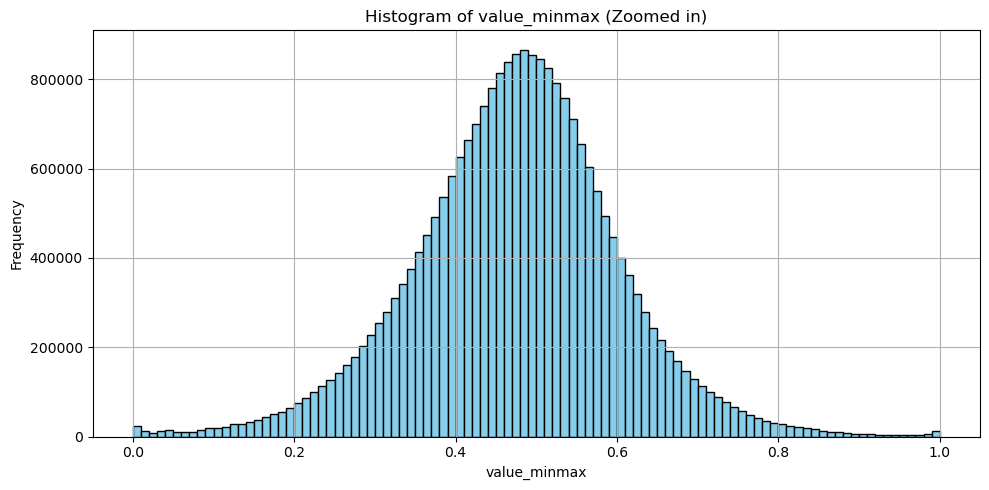

In [39]:
simple_value_histogram(df_x, column='value_minmax', range=(0, 1)) # VALUE DISTRIBUTION

In [42]:
df_x

value  period  value_zscore  value_minmax
id    time                                              
0     0    -0.005564       0     -0.800718      0.328564
      1     0.003705       0      0.530024      0.512889
      2     0.013164       0      1.888001      0.700987
      3     0.007151       0      1.024703      0.581409
      4    -0.009979       0     -1.434461      0.240783
...              ...     ...           ...           ...
10000 2134  0.001137       1      0.107084      0.476334
      2135  0.003526       1      0.438965      0.506360
      2136  0.000687       1      0.044458      0.470669
      2137  0.001640       1      0.176868      0.482648
      2138  0.001074       1      0.098279      0.475538

[23715734 rows x 4 columns]